In [5]:
import tensorflow as tf
import numpy as np

In [2]:
x = tf.constant(2, name='x')
y = tf.constant(3, name='y')

In [3]:
z = tf.add(x,y, name='add')

In [4]:
with tf.Session() as sess:
    print(sess.run(z))
    writer = tf.summary.FileWriter('./data/graphs', sess.graph)
    

5


In [5]:
a = tf.constant(5, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')

d = tf.multiply(a,b, name='multiply')
e = tf.div(c,b, name='divide')
f = tf.mod(d,e, name='modulo')

In [6]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./data/graphs2', sess.graph)
    print(sess.run(d))
    print(sess.run(e))
    print(sess.run(f))

10
1
0


In [7]:
grt = tf.greater(a,b)
lseq = tf.less_equal(c,d)
ab = tf.abs(tf.subtract(b,a))

In [8]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./data/graphs3', sess.graph)
#     print(sess.run(grt))
#     print(sess.run(lseq))
#     print(sess.run(ab))
    fetches = [grt, lseq, ab]
    outs = sess.run(fetches)
    print(outs)

[True, True, 3]


In [9]:
with tf.Session() as sess:
    fetches = [a,b,c,d,e]
    outs = sess.run(fetches)
    print(outs)

[5, 2, 3, 10, 1]


---

In [14]:
g = tf.constant([1,2,3], name='x', dtype=tf.float32)
print(g.dtype)

<dtype: 'float32'>


In [15]:
g = tf.cast(g, tf.int64)
print(g.dtype)

<dtype: 'int64'>


---

## Image Manipulation

In [19]:
h = tf.constant([[1,2,3],
                 [4,5,6]])

In [20]:
print(h.get_shape())

(2, 3)


In [21]:
i = tf.constant(np.array([
    [[1,2,3,4],
     [5,6,7,8],
     [9,8,7,6]],
    
    [[1,1,1,1],
     [2,2,2,2],
     [3,3,3,3]]
]))

In [22]:
print(i.get_shape())

(2, 3, 4)


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
image = mpimg.imread('data/propulsion.png')

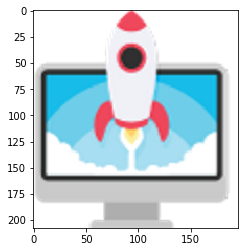

In [11]:
plt.imshow(image)

In [6]:
tf_img = tf.Variable(image, name='propulsion')

model = tf.global_variables_initializer()

In [12]:
with tf.Session() as session:
    tf_img_t = tf.transpose(tf_img, perm=[1,0,2])
    session.run(model)
    result = session.run(tf_img_t)

In [13]:
plt.imshow(result)
None

---

In [33]:
x_data = np.random.randn(5,10)
w_data = np.random.randn(10,1)

with tf.Graph().as_default():
    X = tf.placeholder(tf.float32, shape=x_data.shape)
    W = tf.placeholder(tf.float32, shape=w_data.shape)
    b = tf.fill(x_data.shape, -1.)
    XW = tf.matmul(X,W)
    
    XWb = XW + b
    s = tf.reduce_max(XWb)
    with tf.Session() as sess:
        outs = sess.run(s, feed_dict={X: x_data, W: w_data})
        

print("outs = {}".format(outs))

outs = 0.37594103813171387


---

## Linear Regression - Gradient Descent

In [153]:
x_data = np.random.rand(2000,3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2

noise = np.random.randn(1, 2000) * 0.1

y_data = np.matmul(w_real, x_data.T) + b_real + noise

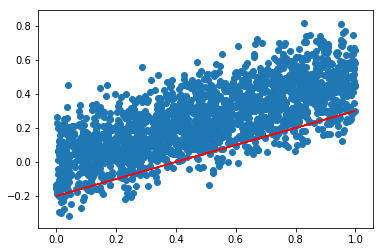

In [154]:
plt.scatter(x_data[:,1], y_data)
plt.plot(x_data[:, 1], w_real[1] * x_data[:,1] + b_real, c='red')
None

In [158]:
STEPS = 75

g = tf.Graph()
wb_ = []

with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None,3])
    y_true = tf.placeholder(tf.float32, shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]], dtype=tf.float32, name='weights')
        b = tf.Variable(0, dtype=tf.float32, name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b
        
    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true - y_pred))
        
    with tf.name_scope('train') as scope:
        learning_rate = 0.525
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(STEPS):
            sess.run(train, {x: x_data, y_true: y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))

        print('final', sess.run([w,b]))

0 [array([[0.15853806, 0.17442001, 0.13725702]], dtype=float32), 0.2635872]
5 [array([[0.09999294, 0.1827079 , 0.01158755]], dtype=float32), -0.0039830655]
10 [array([[0.18857996, 0.31264848, 0.05635647]], dtype=float32), 0.041395016]
15 [array([[0.18886864, 0.3398167 , 0.03085764]], dtype=float32), -0.053469557]
20 [array([[0.22412643, 0.39198947, 0.04966083]], dtype=float32), -0.0613339]
25 [array([[0.23371115, 0.41259104, 0.04949185]], dtype=float32), -0.101535805]
30 [array([[0.25034988, 0.4362827 , 0.06003337]], dtype=float32), -0.115725465]
35 [array([[0.25868064, 0.4492451 , 0.0647584 ]], dtype=float32), -0.13573742]
40 [array([[0.26758933, 0.46117646, 0.07146471]], dtype=float32), -0.1469166]
45 [array([[0.2733442 , 0.46894476, 0.07593636]], dtype=float32), -0.15800527]
50 [array([[0.27847648, 0.4754206 , 0.08031091]], dtype=float32), -0.1655277]
55 [array([[0.28218043, 0.48003715, 0.08358959]], dtype=float32), -0.17203529]
60 [array([[0.28524712, 0.48372814, 0.08642069]], dtyp

---

## Logistic Regression - Gradient Descent

In [167]:
N = 20000

def sigmoid(x):
    return 1/(1+np.exp(-x))

x_data = np.random.randn(N, 3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2

wxb = np.matmul(w_real, x_data.T) + b_real

y_data_pure = sigmoid(wxb)

y_data = np.random.binomial(1, y_data_pure)

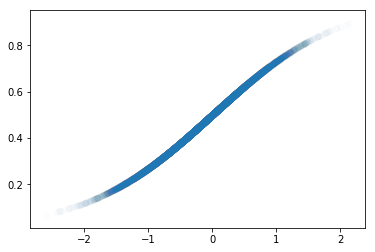

In [188]:
plt.scatter(wxb, y_data_pure, alpha=0.01)
None

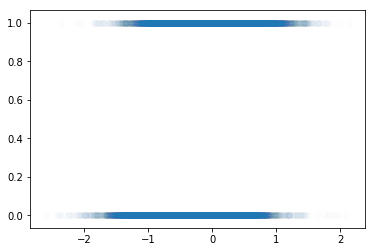

In [187]:
plt.scatter(wxb, y_data, alpha=0.01)
None

In [ ]:
# New Loss
# y_pred = tf.sigmoid(y_pred)
# loss = -y_true * tf.log(y_pred) - (1-y_true)*tf.log(1-y_pred) ## cross-entropy
# loss = tf.reduce_mean(loss)

# tf.nn.sigmoid_cross_entropy_with_logits

In [198]:
STEPS = 35

g = tf.Graph()
wb_ = []

with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None,3])
    y_true = tf.placeholder(tf.float32, shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]], dtype=tf.float32, name='weights')
        b = tf.Variable(0, dtype=tf.float32, name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b
        
#     with tf.name_scope('loss') as scope:
#         loss = tf.reduce_mean(tf.square(y_true - y_pred))
        
    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)
        loss = tf.reduce_mean(loss)
    
    with tf.name_scope('train') as scope:
        learning_rate = 0.525
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)

        init = tf.global_variables_initializer()
        with tf.Session() as sess:
            sess.run(init)
            for step in range(STEPS):
                sess.run(train, {x: x_data, y_true: y_data})
                if (step % 5 == 0):
                    print(step, sess.run([w,b]))
                    wb_.append(sess.run([w,b]))
                
            print('final', sess.run([w,b]))

0 [array([[0.03649598, 0.06105494, 0.01286775]], dtype=float32), -0.021078723]
5 [array([[0.15816286, 0.26510665, 0.05762814]], dtype=float32), -0.09302277]
10 [array([[0.2203399 , 0.36985472, 0.08215816]], dtype=float32), -0.131219]
15 [array([[0.2537293 , 0.42633897, 0.0961172 ]], dtype=float32), -0.15237021]
20 [array([[0.272236  , 0.4577643 , 0.10423537]], dtype=float32), -0.16439003]
25 [array([[0.28268573, 0.47556844, 0.10900803]], dtype=float32), -0.17131923]
30 [array([[0.28865063, 0.48576203, 0.11182735]], dtype=float32), -0.17534465]
final [array([[0.29153448, 0.4907026 , 0.11322793]], dtype=float32), -0.17731814]


---

## What about Matplotlib and the graphs?

[https://github.com/cheind/tf-matplotlib/blob/master/tfmpl/samples/sgd.py](https://github.com/cheind/tf-matplotlib/blob/master/tfmpl/samples/sgd.py)

In [24]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import cm
from datetime import datetime
import tensorflow as tf
import numpy as np
import os

import tfmpl


with tf.Session(graph=tf.Graph()) as sess:

    def beale(x, y):
        '''Beale surface for optimization tests.'''
        with tf.name_scope('beale', [x, y]):
            return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

    # List of optimizers to compare
    optimizers = [
        (tf.train.GradientDescentOptimizer(1e-3), 'SGD'),
        (tf.train.AdagradOptimizer(1e-1), 'Adagrad'),
        (tf.train.AdadeltaOptimizer(1e2), 'Adadelta'),
        (tf.train.AdamOptimizer(1e-1), 'Adam'),            
    ]

    paths = []        
    history = []

    def init_fig(*args, **kwargs):
        '''Initialize figures.'''
        fig = tfmpl.create_figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d', elev=50, azim=-30)
        ax.w_xaxis.set_pane_color((1.0,1.0,1.0,1.0))
        ax.w_yaxis.set_pane_color((1.0,1.0,1.0,1.0))
        ax.w_zaxis.set_pane_color((1.0,1.0,1.0,1.0))
        ax.set_title('Gradient descent on Beale surface')
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.set_zlabel('beale($x$,$y$)')

        xx, yy = np.meshgrid(np.linspace(-4.5, 4.5, 40), np.linspace(-4.5, 4.5, 40))
        zz = beale(xx, yy)
        ax.plot_surface(xx, yy, zz, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=cm.jet)
        ax.plot([3], [.5], [beale(3, .5)], 'k*', markersize=5)

        for o in optimizers:
            path, = ax.plot([],[],[], label=o[1])
            paths.append(path)

        ax.legend(loc='upper left')
        fig.tight_layout()

        return fig, paths

    @tfmpl.blittable_figure_tensor(init_func=init_fig)
    def draw(xy, z):
        '''Updates paths for each optimizer.'''
        history.append(np.c_[xy, z])
        xyz = np.stack(history) #NxMx3
        for idx, path in enumerate(paths):
            path.set_data(xyz[:, idx, 0], xyz[:, idx, 1])
            path.set_3d_properties(xyz[:, idx, 2])

        return paths

    # Create variables for each optimizer
    start = tf.constant_initializer([3., 4.], dtype=tf.float32)
    xys = [tf.get_variable(f'xy_{o[1]}', 2, tf.float32, initializer=start) for o in optimizers]        
    zs = [beale(xy[0], xy[1]) for xy in xys]

    # Define optimization target
    train = []
    for idx, (opt, name) in enumerate(optimizers):
        grads_and_vars = opt.compute_gradients(zs[idx], xys[idx])
        clipped = [(tf.clip_by_value(g, -10, 10), v) for g, v in grads_and_vars]
        train.append(opt.apply_gradients(clipped))

    # Generate summary
    image_tensor = draw(tf.stack(xys), tf.stack(zs))
    image_summary = tf.summary.image('optimization', image_tensor)        
    all_summaries = tf.summary.merge_all()

    # Alloc summary writer
    os.makedirs('data', exist_ok=True)
    now = datetime.now()
    logdir = "data/" + now.strftime("%Y%m%d-%H%M%S") + "/"
    writer = tf.summary.FileWriter(logdir, sess.graph)

    # Run optimization, write summary every now and then.
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(200):              
        if i % 10 == 0:
            summary = sess.run(all_summaries)
            writer.add_summary(summary, global_step=i)
            writer.flush()
        sess.run(train)